<a href="https://colab.research.google.com/github/brunamulinari/TechLabsProject_PsiData/blob/main/Sistema_E_Saude_Perfil_de_atendimento_nas_Unidades_Municipais_de_Curitiba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema E-Saude - Perfil de atendimento nas Unidades Municipais de Curitiba

E-Saúde é um sistema para **automatização de agendamento de consultas e realização de teleconsultas**. Foi criado em 2020.

Base de dados do sistema Informatizado "E-saúde":

Atendimentos prestados pela **Secretaria Municipal de Saúde de Curitiba** em sua rede de atenção. Esta rede é composta por Unidades Básicas de Saúde, Unidades de Pronto Atendimento, Centros de Especialidades Médicas e Odontológicas, entre outros. Os dados disponibilizados para consulta referem-se ao perfil de atendimento dos profissionais de nível superior da rede municipal de saúde. 

Arquivo atualizado mensalmente
(Versão usada: atualizado em 06/05/2021)

Dados retirados de https://www.curitiba.pr.gov.br/dadosabertos/busca/?pagina=8 (Acesso em maio de 2021)

Informação das colunas (Atualizado em 06/09/2019)


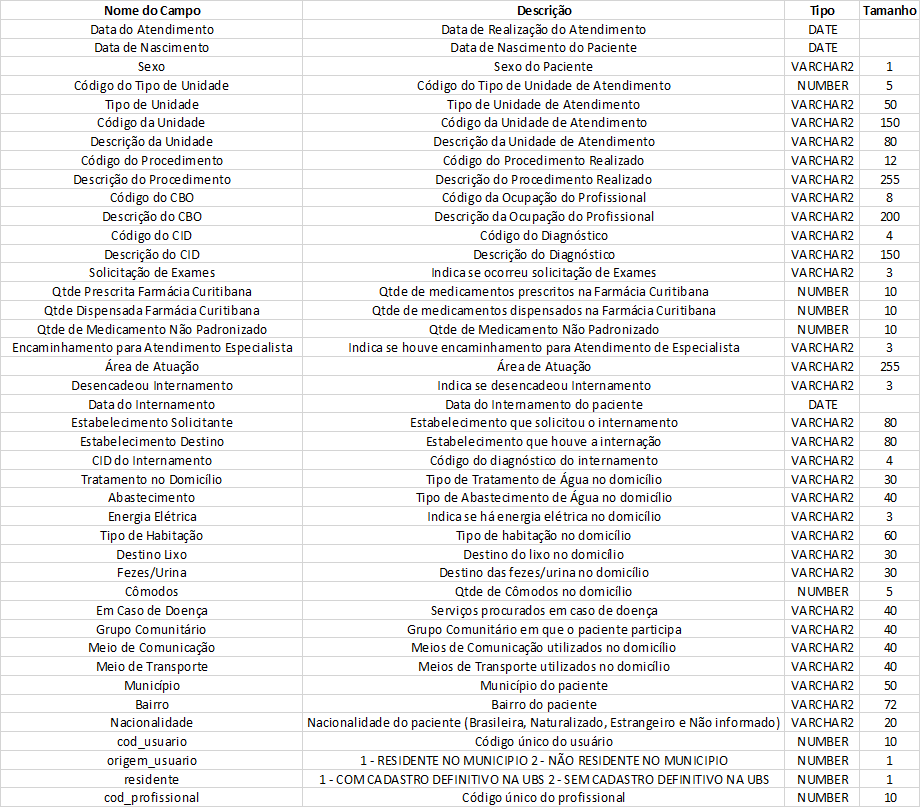

## Análise exploratória dos dados

In [89]:
#Importando dados
import pandas as pd
import numpy as np

df_cwb = pd.read_excel("/content/2021-05-06_Sistema_E-Saude_Outros_Niveis_Superior_-_Base_de_Dados.xlsx")

In [90]:
df_cwb.head()

,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,Descrição do CBO,Código do CID,Descrição do CID,Solicitação de Exames,Qtde Prescrita Farmácia Curitibana,Qtde Dispensada Farmácia Curitibana,Qtde de Medicamento Não Padronizado,Encaminhamento para Atendimento Especialista,Área de Atuação,Desencadeou Internamento,Data do Internamento,Estabelecimento Solicitante,Estabelecimento Destino,CID do Internamento,Tratamento no Domicílio,Abastecimento,Energia Elétrica,Tipo de Habitação,Destino Lixo,Fezes/Urina,Cômodos,Em Caso de Doença,Grupo Comunitário,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Nacionalidade,cod_usuario,origem_usuario,residente,cod_profissional
0,2020-12-01 07:24:16,1929-06-27,M,1,BASICO,17043,UMS TRINDADE PSF,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,223810,FONOAUDIOLOGO,NaN,NaN,Sim,0,0,0,Nao,NaN,Nao,NaN,NaN,NaN,NaN,NaN,NaN,Sim,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,CURITIBA,CAJURU,Brasileira,920303,1,1,43471
1,2020-12-01 14:43:12,1955-06-30,F,1,BASICO,16764,UMS VILA GUAIRA,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,223710,NUTRICIONISTA,NaN,NaN,Sim,0,0,0,Nao,NaN,Nao,NaN,NaN,NaN,NaN,SEM TRATAMENTO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.0,OUTROS,NAO PARTICIPA,"TELEVISAO,RADIO",ONIBUS,CURITIBA,AGUA VERDE,Brasileira,1974553,1,1,58324
2,2020-12-01 08:47:42,1979-12-07,M,1,BASICO,17124,UMS ESMERALDA,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,223605,FISIOTERAPEUTA GERAL,NaN,NaN,Sim,0,0,0,Sim,FISIOTERAPIA - ATENÇÃO ESPECIALIZADA,Nao,NaN,NaN,NaN,NaN,FILTRACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.0,UNIDADE DE SAUDE,GRUPO RELIGIOSO,TELEVISAO,ONIBUS,CURITIBA,XAXIM,Brasileira,757392,1,1,40885
3,2020-12-01 09:48:27,1960-02-25,F,1,BASICO,17124,UMS ESMERALDA,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,223605,FISIOTERAPEUTA GERAL,NaN,NaN,Sim,0,0,0,Sim,FISIOTERAPIA - ATENÇÃO ESPECIALIZADA,Nao,NaN,NaN,NaN,NaN,FILTRACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,CÉU ABERTO,6.0,UNIDADE DE SAUDE,OUTROS,TELEVISAO,ONIBUS,CURITIBA,XAXIM,Brasileira,81810,1,1,40885
4,2020-12-01 10:26:58,1981-12-11,M,1,BASICO,17124,UMS ESMERALDA,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,223605,FISIOTERAPEUTA GERAL,NaN,NaN,Sim,0,0,0,Sim,FISIOTERAPIA - ATENÇÃO ESPECIALIZADA,Nao,NaN,NaN,NaN,NaN,CLORACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,3.0,"UNIDADE DE SAUDE,HOSPITAL",OUTROS,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,XAXIM,Brasileira,82880,1,1,40885


In [84]:
df_cwb.shape

(18903, 42)

In [91]:
# Arrumando o index para começar em 1
indexes = pd.Series(np.arange(1,18904,1))
df_cwb.index = indexes

df_cwb

,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,Descrição do CBO,Código do CID,Descrição do CID,Solicitação de Exames,Qtde Prescrita Farmácia Curitibana,Qtde Dispensada Farmácia Curitibana,Qtde de Medicamento Não Padronizado,Encaminhamento para Atendimento Especialista,Área de Atuação,Desencadeou Internamento,Data do Internamento,Estabelecimento Solicitante,Estabelecimento Destino,CID do Internamento,Tratamento no Domicílio,Abastecimento,Energia Elétrica,Tipo de Habitação,Destino Lixo,Fezes/Urina,Cômodos,Em Caso de Doença,Grupo Comunitário,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Nacionalidade,cod_usuario,origem_usuario,residente,cod_profissional
1,2020-12-01 07:24:16,1929-06-27,M,1,BASICO,17043,UMS TRINDADE PSF,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,223810,FONOAUDIOLOGO,NaN,NaN,Sim,0,0,0,Nao,NaN,Nao,NaN,NaN,NaN,NaN,NaN,NaN,Sim,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,CURITIBA,CAJURU,Brasileira,920303,1,1,43471
2,2020-12-01 14:43:12,1955-06-30,F,1,BASICO,16764,UMS VILA GUAIRA,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,223710,NUTRICIONISTA,NaN,NaN,Sim,0,0,0,Nao,NaN,Nao,NaN,NaN,NaN,NaN,SEM TRATAMENTO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.0,OUTROS,NAO PARTICIPA,"TELEVISAO,RADIO",ONIBUS,CURITIBA,AGUA VERDE,Brasileira,1974553,1,1,58324
3,2020-12-01 08:47:42,1979-12-07,M,1,BASICO,17124,UMS ESMERALDA,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,223605,FISIOTERAPEUTA GERAL,NaN,NaN,Sim,0,0,0,Sim,FISIOTERAPIA - ATENÇÃO ESPECIALIZADA,Nao,NaN,NaN,NaN,NaN,FILTRACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.0,UNIDADE DE SAUDE,GRUPO RELIGIOSO,TELEVISAO,ONIBUS,CURITIBA,XAXIM,Brasileira,757392,1,1,40885
4,2020-12-01 09:48:27,1960-02-25,F,1,BASICO,17124,UMS ESMERALDA,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,223605,FISIOTERAPEUTA GERAL,NaN,NaN,Sim,0,0,0,Sim,FISIOTERAPIA - ATENÇÃO ESPECIALIZADA,Nao,NaN,NaN,NaN,NaN,FILTRACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,CÉU ABERTO,6.0,UNIDADE DE SAUDE,OUTROS,TELEVISAO,ONIBUS,CURITIBA,XAXIM,Brasileira,81810,1,1,40885
5,2020-12-01 10:26:58,1981-12-11,M,1,BASICO,17124,UMS ESMERALDA,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,223605,FISIOTERAPEUTA GERAL,NaN,NaN,Sim,0,0,0,Sim,FISIOTERAPIA - ATENÇÃO ESPECIALIZADA,Nao,NaN,NaN,NaN,NaN,CLORACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,3.0,"UNIDADE DE SAUDE,HOSPITAL",OUTROS,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,XAXIM,Brasileira,82880,1,1,40885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18899,2021-02-17 13:14:27,1977-12-29,M,1,BASICO,5506115,UMS ALVORADA PSF,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,22410,PROFISSIONAL DE EDUCACAO FISICA NA SAUDE,NaN,NaN,Sim,0,0,0,Nao,NaN,Nao,NaN,NaN,NaN,NaN,NaN,NaN,Sim,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,CURITIBA,UBERABA,Brasileira,5315468,1,1,45090
18900,2020-12-10 09:45:00,1942-04-15,M,1,BASICO,17256,UMS CONCORDIA PSF,301010137,CONSULTA/ATENDIMENTO DOMICILIAR,22410,PROFISSIONAL DE EDUCACAO FISICA NA SAUDE,NaN,NaN,Sim,0,0,0,Nao,NaN,Nao,NaN,NaN,NaN,NaN,FILTRACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,4.0,"UNIDADE DE SAUDE,HOSPITAL",GRUPO RELIGIOSO,"TELEVISAO,RADIO,OUTROS",ONIBUS,CURITIBA,PINHEIRINHO,Brasileira,226455,1,1,45111
18901,2021-01-07 12:08:42,1946-07-17,F,1,BASICO,17116,UMS SAO PAULO,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,22410,PROFISSIONAL DE EDUCACAO FISICA NA SAUDE,NaN,NaN,Sim,0,0,0,Nao,NaN,Nao,NaN,NaN,NaN,NaN,CLORACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,8.0,OUTROS,OUTROS,OUTROS,OUTROS,CURITIBA,GUABIRO

In [11]:
# Quantidade de dados em cada coluna, tipo da variável
df_cwb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18903 entries, 0 to 18902
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Data do Atendimento                           18903 non-null  datetime64[ns]
 1   Data de Nascimento                            18903 non-null  datetime64[ns]
 2   Sexo                                          18903 non-null  object        
 3   Código do Tipo de Unidade                     18903 non-null  int64         
 4   Tipo de Unidade                               18903 non-null  object        
 5   Código da Unidade                             18903 non-null  int64         
 6   Descrição da Unidade                          18903 non-null  object        
 7   Código do Procedimento                        18903 non-null  int64         
 8   Descrição do Procedimento                     18903 non-null  obje

In [99]:
# Adquirindo a idade das pessoas 

from dateutil.relativedelta import *
from datetime import date

today = date.today()
ages = pd.Series([])


for i in range(1,18903):
#não pegou o último valor (18903), quando eu coloco o range até 1904 fala que tá fora dos limites da df  
  dob = df_cwb.iloc[i,1]
  age = relativedelta(today, dob)
  ages[i] = age.years  

df_cwb['Idade'] = ages



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


In [101]:
#Análise das variáveis quantitativas

,Código do Tipo de Unidade,Código da Unidade,Código do Procedimento,Código do CBO,Código do CID,Descrição do CID,Qtde Prescrita Farmácia Curitibana,Qtde Dispensada Farmácia Curitibana,Qtde de Medicamento Não Padronizado,Data do Internamento,Estabelecimento Solicitante,Estabelecimento Destino,CID do Internamento,Cômodos,cod_usuario,origem_usuario,residente,cod_profissional,Idade
count,18903.000000,1.890300e+04,1.890300e+04,18903.000000,0.0,0.0,18903.000000,18903.000000,18903.0,0.0,0.0,0.0,0.0,18747.000000,1.890300e+04,18903.000000,18903.000000,18903.000000,18902.000000
mean,1.318468,1.146537e+06,3.584320e+08,236138.446543,NaN,NaN,25.090673,2.225361,0.0,NaN,NaN,NaN,NaN,5.381981,5.058240e+06,1.001693,1.029889,48767.704597,40.270183
std,0.731735,2.056416e+06,1.609685e+08,22194.986037,NaN,NaN,660.879421,24.317783,0.0,NaN,NaN,NaN,NaN,2.379897,3.857088e+06,0.041111,0.170287,21101.159470,22.947408
min,1.000000,1.546600e+04,1.010198e+08,22410.000000,NaN,NaN,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,0.000000,8.700000e+01,1.000000,1.000000,20879.000000,0.000000
25%,1.000000,1.681000e+04,3.010100e+08,223605.000000,NaN,NaN,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,5.000000,1.233060e+06,1.000000,1.000000,39505.000000,20.000000
50%,1.000000,1.714000e+04,3.010100e+08,223810.000000,NaN,NaN,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,5.000000,4.296209e+06,1.000000,1.000000,43342.000000,41.000000
75%,1.000000,2.639394e+06,3.010102e+08,251510.000000,NaN,NaN,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,6.000000,8.973736e+06,1.000000,1.000000,54836.000000,59.000000
max,3.000000,9.381015e+06,8.020300e+08,251605.000000,NaN,NaN,55350.000000,1152.000000,0.0,NaN,NaN,NaN,NaN,100.000000,1.087061e+07,2.000000,2.000000,100966.000000,101.000000


In [24]:
#Análise das variáveis qualitativas
df_cwb.describe(include=['object'])

,Sexo,Tipo de Unidade,Descrição da Unidade,Descrição do Procedimento,Descrição do CBO,Solicitação de Exames,Encaminhamento para Atendimento Especialista,Área de Atuação,Desencadeou Internamento,Tratamento no Domicílio,Abastecimento,Energia Elétrica,Tipo de Habitação,Destino Lixo,Fezes/Urina,Em Caso de Doença,Grupo Comunitário,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Nacionalidade
count,18903,18903,18903,18903,18903,18903,18903,3511,18903,16986,16990,18903,16992,16991,16991,16990,16990,16990,16990,18903,18903,18903
unique,2,3,108,16,8,2,2,13,1,4,5,2,8,4,6,61,5,7,28,16,94,4
top,F,BASICO,CENTRO DE ESPECIALIDADES MEDICAS ENCANTAR,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,PSICOLOGO CLINICO,Nao,Nao,FISIOTERAPIA - ATENÇÃO ESPECIALIZADA,Nao,SEM TRATAMENTO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,UNIDADE DE SAUDE,NAO PARTICIPA,"TELEVISAO,RADIO",ONIBUS,CURITIBA,CIDADE INDUSTRIAL,Brasileira
freq,12130,15892,2199,8050,9226,12453,15287,2116,18903,9103,16630,17839,15283,16774,15951,8167,12054,6235,9120,18871,3242,18666


Aqui já podemos ver algumas informações, como:

A maioria é mulher, o profissional mais requisitado é o psicólogo clínico,

a maioria não tem tratamento de água, maioria de Curitiba do bairro CIC.

Agora vamos ver a quantidade de valores de algumas colunas:

In [102]:
df_cwb['Sexo'].value_counts()

F    12130
M     6773
Name: Sexo, dtype: int64

In [103]:
df_cwb['Idade'].value_counts()

0.0      485
54.0     318
52.0     312
59.0     310
61.0     301
        ... 
95.0       2
94.0       2
97.0       2
98.0       1
101.0      1
Name: Idade, Length: 101, dtype: int64

In [104]:
df_cwb['Descrição do CBO'].value_counts()

PSICOLOGO CLINICO                           9226
FISIOTERAPEUTA GERAL                        4789
NUTRICIONISTA                               2282
FARMACEUTICO                                1739
FONOAUDIOLOGO                                577
ASSISTENTE SOCIAL                            150
PROFISSIONAL DE EDUCACAO FISICA NA SAUDE     123
TERAPEUTA OCUPACIONAL                         17
Name: Descrição do CBO, dtype: int64

In [105]:
df_cwb['Tratamento no Domicílio'].value_counts()

SEM TRATAMENTO    9103
CLORACAO          3923
FILTRACAO         3863
FERVURA             97
Name: Tratamento no Domicílio, dtype: int64

In [107]:
df_cwb['Energia Elétrica'].value_counts()

Sim    17839
Nao     1064
Name: Energia Elétrica, dtype: int64

In [108]:
df_cwb['Tipo de Habitação'].value_counts()

TIJOLO/ALVENARIA COM REVESTIMENTO    15283
MADEIRA APARELHADA                    1160
TIJOLO ALVENARIA SEM REVESTIMENTO      316
OUTRO MATERIAL                         170
MATERIAL APROVEITADO                    42
TAIPA COM REVESTIMENTO                  12
TAIPA SEM REVESTIMENTO                   6
PALHA                                    3
Name: Tipo de Habitação, dtype: int64

In [109]:
df_cwb['Destino Lixo'].value_counts()

COLETADO              16774
OUTROS                  168
QUEIMADO/ENTERRADO       25
CÉU ABERTO               24
Name: Destino Lixo, dtype: int64

In [110]:
df_cwb['Fezes/Urina'].value_counts()

SISTEMA DE ESGOTO               15951
FOSSA SÉPTICA                     629
OUTROS                            241
CÉU ABERTO                        157
FOSSA RUDIMENTAR                    7
DIRETO PARA RIO, LAGO OU MAR        6
Name: Fezes/Urina, dtype: int64

In [111]:
df_cwb['Bairro'].value_counts()

CIDADE INDUSTRIAL       3242
SITIO CERCADO           1723
CAJURU                  1160
BOQUEIRAO                824
UBERABA                  750
                        ... 
AFONSO PENNA               1
CRUZEIRO                   1
VILA BANCARIA              1
ZONA RURAL                 1
FERRARIA CAMPO LARGO       1
Name: Bairro, Length: 94, dtype: int64

In [115]:
df_cwb['Municício'].value_counts()

CURITIBA                 18871
COLOMBO                      5
SAO JOSE DOS PINHAIS         4
CAMPO LARGO                  4
BALSA NOVA                   3
CAMPO MAGRO                  3
PINHAIS                      2
ARAUCARIA                    2
ALMIRANTE TAMANDARE          2
PAULA FREITAS                1
TUNEIRAS DO OESTE            1
FAZENDA RIO GRANDE           1
CAMPINA GRANDE DO SUL        1
UMUARAMA                     1
PIRAQUARA                    1
NAO INFORMADO                1
Name: Municício, dtype: int64

In [112]:
df_cwb['Nacionalidade'].value_counts()

Brasileira       18666
Estrangeiro        138
Não informado       98
Naturalizado         1
Name: Nacionalidade, dtype: int64

In [117]:
# Análise da quantidade de valores nulos

df_cwb.isnull().sum()

Data do Atendimento                                 0
Data de Nascimento                                  0
Sexo                                                0
Código do Tipo de Unidade                           0
Tipo de Unidade                                     0
Código da Unidade                                   0
Descrição da Unidade                                0
Código do Procedimento                              0
Descrição do Procedimento                           0
Código do CBO                                       0
Descrição do CBO                                    0
Código do CID                                   18903
Descrição do CID                                18903
Solicitação de Exames                               0
Qtde Prescrita Farmácia Curitibana                  0
Qtde Dispensada Farmácia Curitibana                 0
Qtde de Medicamento Não Padronizado                 0
Encaminhamento para Atendimento Especialista        0
Área de Atuação             